In [11]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt
from fastMRI.data import transforms as T
from fastMRI.common.subsample import MaskFunc


In [12]:

def sub_sample_kspace(vol, mask_func):
    """
    Transform a kpsace tensor to an undersampled 3D image using mask object 4x or 8x.
    Args:
        vol: kspace tensor
        mask_func: mask function object (4x, 8x)
    Returns:
        sampled_image: output undersampled 3D image volume
    """
    
    # 1. convert numpy to torch tensor
    kspace2ttensor = T.to_tensor(vol)
    
    ### NO MASKING IN TEST DATA AS IT IS ALREADY UNDERSAMPLED
    # 2. apply mask to kspace
    #masked_kspace, mask = T.apply_mask(kspace2ttensor, mask_func)   
    
    # 3. inverse fast fourier transform 2D
    sampled_image = T.ifft2(kspace2ttensor)
    
    # 4. compute absolute value to get a real image
    sampled_image_abs = T.complex_abs(sampled_image)
    
    # 5. centre crop to 320x320
    cropped_image = T.center_crop(sampled_image_abs, (320, 320))
    
    # 6. Normalize
    #cropped_image_norm, _, _ = T.normalize_instance(cropped_image)

    # 7. convert torch tensor to good old numpy array
    sampled_image = np.abs(cropped_image.numpy())
    
    return sampled_image

def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

In [73]:
file = 'Dataset/singlecoil_file/file1002569.h5'
hf = h5py.File(file)
print(type(hf))

<class 'h5py._hl.files.File'>


In [74]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']
Attrs: {'norm': 0.327495382705101, 'max': 0.0008807593449222425, 'patient_id': 'b342cf1f5bb020289b8afdae32ce74208009fe13c291d8c84fedcfb45602e0e8', 'acquisition': 'CORPD_FBK'}


In [86]:
mask = hf['kspace']
mask

<HDF5 dataset "kspace": shape (36, 640, 356), type "<c8">

In [77]:
kspace_tensor = hf['kspace'][()]
print(kspace_tensor.shape)
img_3d = sub_sample_kspace(kspace_tensor, _)
print(img_3d.shape)

(36, 640, 356)
(36, 320, 320)


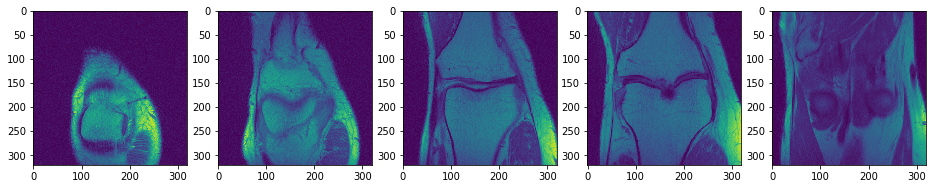

In [78]:
slice_num = [5,10,15,20,30]
show_slices(img_3d, slice_num)

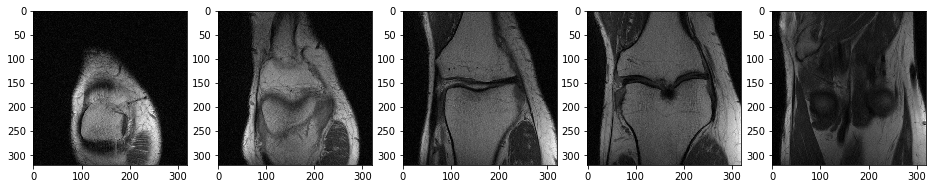

In [79]:
slice_num = [5,10,15,20,30]
show_slices(img_3d, slice_num, cmap = 'gray')

2.1073047e-08 0.0008807594


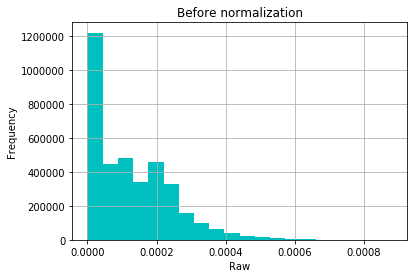

In [80]:
img_flat = img_3d.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("Before normalization")
plt.xlabel("Raw")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [81]:
def normalize(image):
    flat = image.flatten()
    MIN_BOUND = min(flat)
    MAX_BOUND = max(flat)
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image>1] = 1.
    image[image<0] = 0.
    return image

In [82]:
img_normal=normalize(img_3d)
img_normal.shape

(36, 320, 320)

0.0 1.0


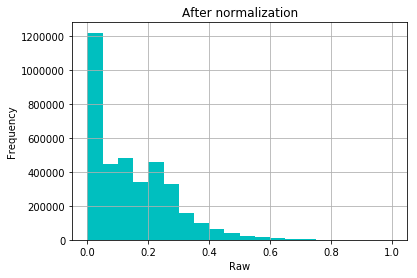

In [83]:
img_flat = img_normal.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("After normalization")
plt.xlabel("Raw")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [84]:
# go back to original distribution
img_org = img_normal * 0.00039228407 +2.4326534e-08 

2.4326534e-08 0.0003923084


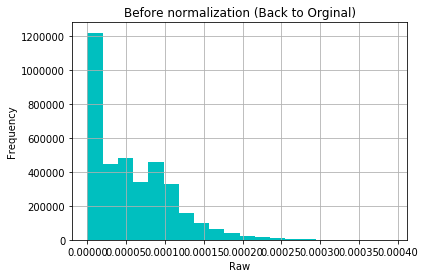

In [85]:
img_flat = img_org.flatten()
print(min(img_flat), max(img_flat))
plt.hist(img_flat, bins=20, color='c')
plt.title("Before normalization (Back to Orginal)")
plt.xlabel("Raw")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [25]:
import os
def create_directory(directory):
    '''
    Creates a new folder in the specified directory if the folder doesn't exist.
    INPUT
        directory: Folder to be created, called as "folder/".
    OUTPUT
        New folder in the current directory.
    '''
    if not os.path.exists(directory):
        os.makedirs(directory)

In [26]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")
LOW_DIR = "singlecoil_test_3D_images/"
create_directory("{}/{}".format(DATASET_PATH,LOW_DIR))

In [27]:
TEST_IMAGES_DIR_PATH = os.path.join(DATASET_PATH,LOW_DIR)
TEST_IMAGES_DIR_PATH


'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_test_3D_images/'

In [69]:
import glob
h5_files = glob.glob(os.path.join(DATASET_PATH,'singlecoil_file','*.h5'))

In [70]:
print(len(h5_files))

280


In [71]:
h5_files[:]

['C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001892.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001901.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001902.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001905.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001906.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001907.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001908.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001909.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001910.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001912.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001915.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001919.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001920.h5',
 'C:\\Users\\shuvo\\cse499\\dataset\\singlecoil_file\\file1001922.h5',
 'C:\\

In [72]:
from tqdm import tqdm
i=0
for file in tqdm(h5_files[:]) :
    i+=1
    
    hf = h5py.File(file)
    
    # transform and save low res image volume
    kspace_tensor = hf['kspace'][()]
    img_3d = sub_sample_kspace(kspace_tensor, _)
    
    # Save 
    np.save("{}/f{}.npy".format(TEST_IMAGES_DIR_PATH, file[-16:-3]), img_3d)

    # Show progress
    #print(i, file, "raw data - ", kspace_tensor.shape, "--", "input test volume - ", img_3d.shape)

print("all file converted kspace to npy")

100%|████████████████████████████████████████████████████████████████████████████████| 280/280 [04:45<00:00,  1.02s/it]

all file converted kspace to npy
